# DRUGS - Multiclass Classification
### Goal : To predict the Drug by analyzing age, sex, blood pressure,Cholesterol and Na_to_K

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
# import csv to dataframe
df = pd.read_csv('drug.csv')

In [119]:
## Data Exploration

In [120]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [121]:
df.shape

(200, 6)

In [122]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

## Data Pre-processing

### Data Cleaning

### Dropping Duplicates

In [123]:
df.duplicated().sum()

0

no duplicates found. We can skip this step

### filling missing values

In [124]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

no missing values found. We can also skip this step

### removing extreme values
we are looking for extreme values in features that is numerical type

In [125]:
#getting numeric field information
def num_field_info(df,col):
    print("Min :",df[col].min())
    print("Max :",df[col].max())
    print("Avg :",df[col].mean())
    print("Mode :",df[col].mode())
    print("Median :",df[col].median())
    sns.boxplot(df[col])

Min : 15
Max : 74
Avg : 44.315
Mode : 0    47
Name: Age, dtype: int64
Median : 45.0


C:\Users\Jake\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


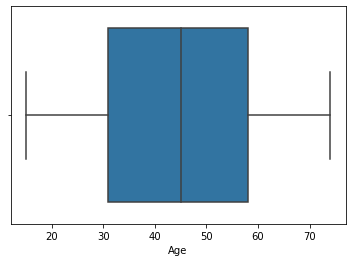

In [126]:
num_field_info(df,'Age')

Min : 6.269
Max : 38.247
Avg : 16.08448499999999
Mode : 0    12.006
1    18.295
Name: Na_to_K, dtype: float64
Median : 13.9365


C:\Users\Jake\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


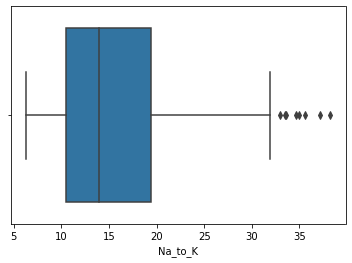

In [127]:
num_field_info(df,'Na_to_K')

In [128]:
#iqr
##removing outliers

def remove_outliers(df,col):
    q1 = df[col].quantile(0.25);
    q3 = df[col].quantile(0.75);
    iqr = q3 - q1;
    
    max_ = q3 + (1.5*iqr);
    min_ = q1 - (1.5*iqr);
    
    df[col][df[col] < min_] = min_;
    df[col][df[col] > max_] = max_;
    

In [129]:
remove_outliers(df,'Na_to_K')

C:\Users\Jake\AppData\Local\Temp\ipykernel_20012\1387051332.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] < min_] = min_;
C:\Users\Jake\AppData\Local\Temp\ipykernel_20012\1387051332.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] > max_] = max_;


C:\Users\Jake\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Min : 6.269
Max : 32.78175
Avg : 15.992219999999996
Mode : 0    32.78175
Name: Na_to_K, dtype: float64
Median : 13.9365


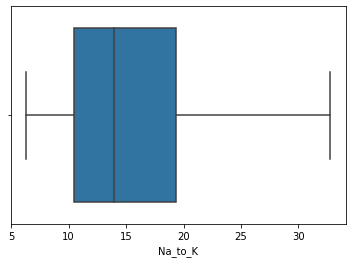

In [130]:
num_field_info(df,'Na_to_K')

## Converting Categorical Values to numerical

In [131]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [132]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder(); 


In [133]:
df_new = df.copy(); #setting checkpoint to preserve data

In [134]:
#encode features except Cholesterol
for col in df.columns:
    if (col != 'Cholesterol'):
        df_new[col] = encoder.fit_transform(df_new[col]); 

In [135]:
# if cholesterol is high = true
df_new['Cholesterol'] = np.where(df_new['Cholesterol'] == 'HIGH',1,0)

In [136]:
df_new

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8,0,0,1,167,0
1,30,1,1,1,89,3
2,30,1,1,1,43,3
3,12,0,2,1,10,4
4,44,0,1,1,133,0
...,...,...,...,...,...,...
195,39,0,1,1,69,3
196,1,1,1,1,75,3
197,35,1,2,1,36,4
198,8,1,2,0,102,4


## Scaling Value

In [137]:
from sklearn.preprocessing import MinMaxScaler;

df_scaled = df_new.copy();
scaler = MinMaxScaler();

In [138]:
for col in df_scaled.columns:
    if (col != 'Drug'):
        df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1)); 

In [139]:
df_scaled

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0.142857,0.0,0.0,1.0,0.878947,0
1,0.535714,1.0,0.5,1.0,0.468421,3
2,0.535714,1.0,0.5,1.0,0.226316,3
3,0.214286,0.0,1.0,1.0,0.052632,4
4,0.785714,0.0,0.5,1.0,0.700000,0
...,...,...,...,...,...,...
195,0.696429,0.0,0.5,1.0,0.363158,3
196,0.017857,1.0,0.5,1.0,0.394737,3
197,0.625000,1.0,1.0,1.0,0.189474,4
198,0.142857,1.0,1.0,0.0,0.536842,4


## Feature Selection/ Correlation Analysis

<AxesSubplot:>

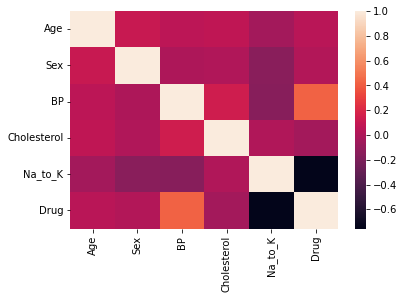

In [140]:
sns.heatmap(df_scaled.corr())

no correlation found on our data set

## Modelling

In [141]:
#splitting our target variable from other features
#Drug is the target variable
from sklearn.preprocessing import label_binarize

X = df_scaled.drop(['Drug'],axis = 1)
y = df_scaled['Drug']
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2,3,4])


In [142]:
#splitting our dataset to training and testing set

from sklearn.model_selection import train_test_split;
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, train_size = .80, stratify = y)
print(X.shape) # 100%
print(X_train.shape) #.80
print(X_test.shape) #.20

#classifying using 1-vs-r
#classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
#y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


(200, 5)
(160, 5)
(40, 5)


## Chossing a Model

In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

def evaluate_model(model):
    print('Classification Report \n', classification_report(y_test, model.predict(X_test), target_names = ['0','1','2','3','4']));
    #print('Confusion Matrix \n', confusion_matrix(y_test, model.predict(X_test), labels = [0,1]));
    print('Training Accuracy Score : ', model.score(X_train, y_train))
    print('Test Accuracy Score : ', model.score(X_test, y_test))
    #plot_roc_curve(model, X_test,y_test)
    print(OneVsRestClassifier(LinearSVC(random_state=10)).fit(X, y).predict(X))
    #print(y_score)
    

Decision Tree Classifier

In [146]:
#import DTC
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier() #create an instance
dtc.fit(X_train, y_train) #fit train to algo
dtc.score(X_test, y_test) # fit test to algo
evaluate_model(dtc) # evaluate model

Classification Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.91      0.95        11

   micro avg       0.97      0.97      0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40
 samples avg       0.97      0.97      0.97        40

Training Accuracy Score :  1.0
Test Accuracy Score :  0.975
[[1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0

Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
evaluate_model(rfc) # evaluate model

Classification Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      1.00      1.00         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       1.00      0.91      0.95        11

   micro avg       0.97      0.95      0.96        40
   macro avg       0.99      0.92      0.95        40
weighted avg       0.98      0.95      0.96        40
 samples avg       0.95      0.95      0.95        40

Training Accuracy Score :  1.0
Test Accuracy Score :  0.95
[[1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 

C:\Users\Jake\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusion

1. BernoulliNB and Logistic regression not applicable
2. Got the 1-vs-r matrix
3. Can't get the ROC curve running
